# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 652


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

### Use chicago as an example to see data structure

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

chicago_url = url + "&q=" + "chicago"

chicago_weather = requests.get(chicago_url).json()
chicago_weather

{'coord': {'lon': -87.65, 'lat': 41.85},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 51.3,
  'feels_like': 48.24,
  'temp_min': 48.18,
  'temp_max': 53.37,
  'pressure': 1019,
  'humidity': 45},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 180},
 'clouds': {'all': 20},
 'dt': 1682605558,
 'sys': {'type': 2,
  'id': 2011010,
  'country': 'US',
  'sunrise': 1682592751,
  'sunset': 1682642624},
 'timezone': -18000,
 'id': 4887398,
 'name': 'Chicago',
 'cod': 200}

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | vanersborg
Processing Record 3 of Set 1 | banda aceh
Processing Record 4 of Set 1 | antsohihy
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | makung
City not found. Skipping...
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | manokwari
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | labuhan
Processing Record 21 of Set 1 | itarema
Proce

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,71.9667,102.5000,18.50,94,43,8.84,RU,1682606089
1,vanersborg,58.3807,12.3234,51.91,34,0,17.27,SE,1682606090
2,banda aceh,5.5577,95.3222,81.55,79,100,5.08,ID,1682606090
3,antsohihy,-14.8796,47.9875,83.14,65,46,5.44,MG,1682606090
4,victoria,22.2855,114.1577,73.96,89,86,13.00,HK,1682606029


### Convert timestamp to yyyy/mm/dd date

In [42]:
date = datetime.date.fromtimestamp(1682606089)
date_printed = print(date)
date_printed

2023-04-27


In [44]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [45]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khatanga,71.9667,102.5000,18.50,94,43,8.84,RU,1682606089
1,vanersborg,58.3807,12.3234,51.91,34,0,17.27,SE,1682606090
2,banda aceh,5.5577,95.3222,81.55,79,100,5.08,ID,1682606090
3,antsohihy,-14.8796,47.9875,83.14,65,46,5.44,MG,1682606090
4,victoria,22.2855,114.1577,73.96,89,86,13.00,HK,1682606029


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

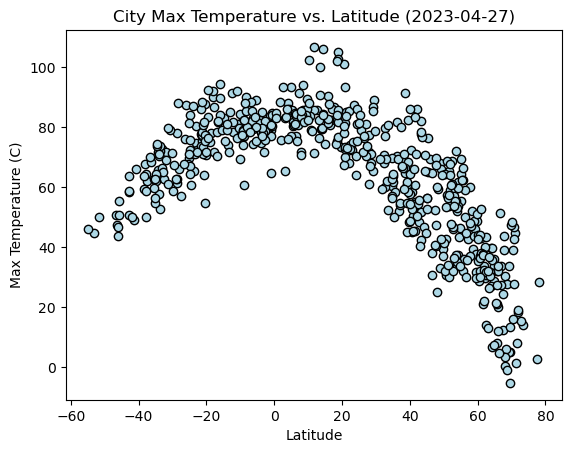

In [47]:
# Build scatter plot for latitude vs. temperature

latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']

plt.scatter(x=latitude, y=max_temp, color = 'lightblue', edgecolor = 'black')

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

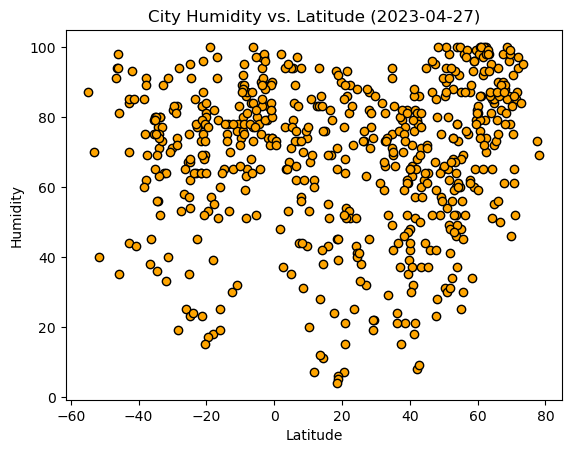

In [48]:
# Build the scatter plots for latitude vs. humidity

latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']

plt.scatter(x=latitude, y=humidity, color = 'orange', edgecolor = 'black')

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

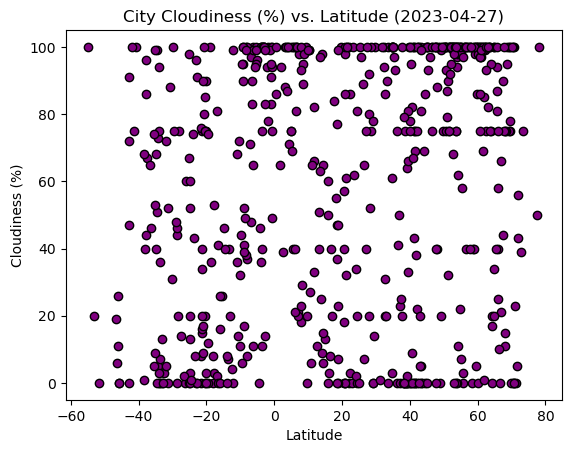

In [49]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

plt.scatter(x=latitude, y=cloudiness, color = 'purple', edgecolor = 'black')

# Incorporate the other graph properties
plt.title("City Cloudiness (%) vs. Latitude (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

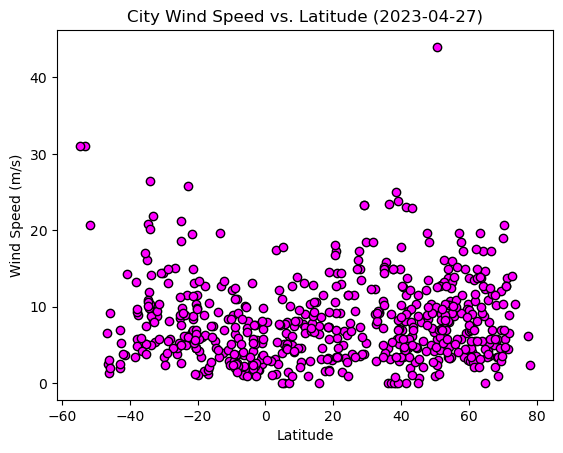

In [50]:
# Build the scatter plots for latitude vs. wind speed

latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

plt.scatter(x=latitude, y=wind_speed, color = 'magenta', edgecolor = 'black')

# Incorporate the other graph properties
plt.title("City Wind Speed vs. Latitude (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


### The arguments of the linear regression plot functions are: x (independent variable), y (dependent variable), annotate_x (x coordinate of annotation), annotate_y (y coordinate of annotation), title, xlabel, & ylabel

In [52]:
# Define a function to create Linear Regression plots

def lin_reg_plot(x,y,annotate_x,annotate_y,title,xlabel,ylabel):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(annotate_x,annotate_y),fontsize=15,color="red")
    plt.title(f"{title}")
    plt.xlabel(f"{xlabel}")
    plt.ylabel(f"{ylabel}")
    plt.show()

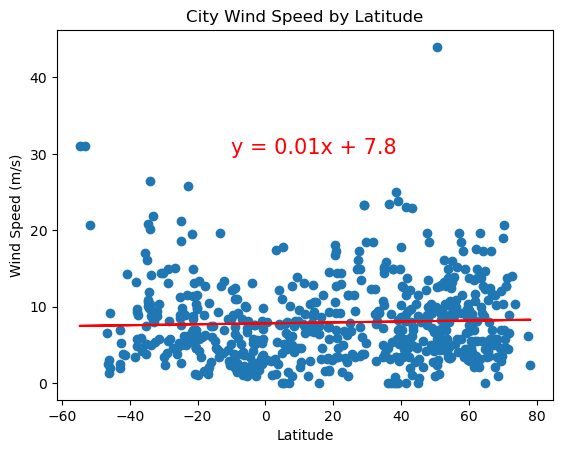

In [55]:
### Test linear regression scatter plot function on wind speed and latitude
lin_reg_plot(city_data_df['Lat'], city_data_df['Wind Speed'],-10,30,"City Wind Speed by Latitude","Latitude","Wind Speed (m/s)")

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khatanga,71.9667,102.5000,18.50,94,43,8.84,RU,1682606089
1,vanersborg,58.3807,12.3234,51.91,34,0,17.27,SE,1682606090
2,banda aceh,5.5577,95.3222,81.55,79,100,5.08,ID,1682606090
4,victoria,22.2855,114.1577,73.96,89,86,13.00,HK,1682606029
5,barrow,71.2906,-156.7887,1.42,85,0,13.80,US,1682606090


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,antsohihy,-14.8796,47.9875,83.14,65,46,5.44,MG,1682606090
6,rikitea,-23.1203,-134.9692,74.55,64,96,6.17,PF,1682606091
7,mar del plata,-38.0023,-57.5575,67.82,75,40,5.75,AR,1682606063
9,kaitangata,-46.2817,169.8464,47.25,94,6,2.42,NZ,1682606091
10,punta arenas,-53.1500,-70.9167,44.71,70,20,31.07,CL,1682605943


###  Temperature vs. Latitude Linear Regression Plot

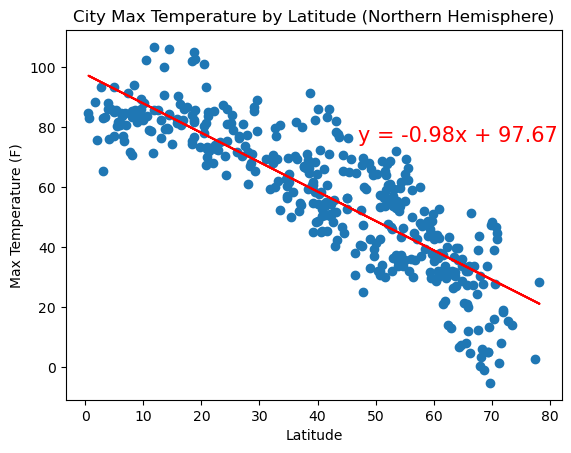

In [96]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],47,75,"City Max Temperature by Latitude (Northern Hemisphere)","Latitude","Max Temperature (F)")

In [63]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
res = sts.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.724385


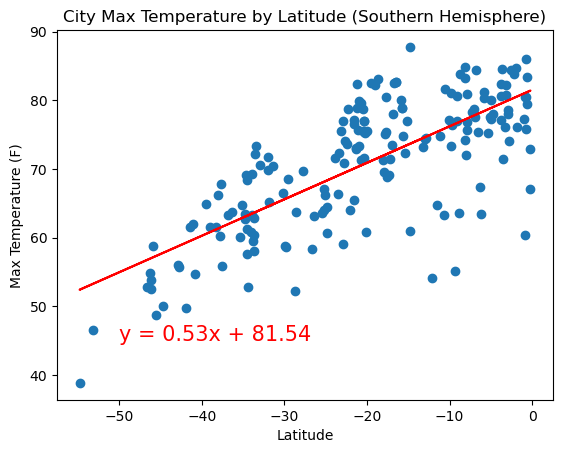

In [53]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],-50,45,"City Max Temperature by Latitude (Southern Hemisphere)","Latitude","Max Temperature (F)")

In [64]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
res = sts.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.529930


**Discussion about the linear relationship:** 

### There is a linear relationship between Latitude and Maximum Temperature in both the Northern and Southern Hemispheres. A Latitude of 0 denotes the Earth's equator. In the Northern Hemisphere, the slope of the line of best fit is -.98, meaning that for every degree N of the equator, Max Temperature climbs almost an entire degree (F). In the Southern Hemisphere, the slope of the line of best fit is .53, meaning that for every degree S of the equator, Max Temperature climbs approximately half a degree (F). With R-Squared values of .72 and .53 respectively (N and S), the former would be considered strong and the latter: marginally strong. It's curious that these two linear models are not simply each other's mirror image. Without much speculation, it's plausible that this has to do with the Earth's axial tilt (23.5 degrees). 

### Humidity vs. Latitude Linear Regression Plot

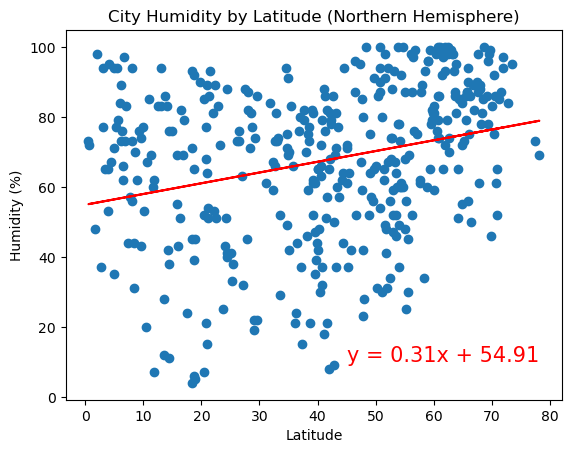

In [74]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],45,10,"City Humidity by Latitude (Northern Hemisphere)","Latitude","Humidity (%)")

In [72]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
res = sts.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.074596


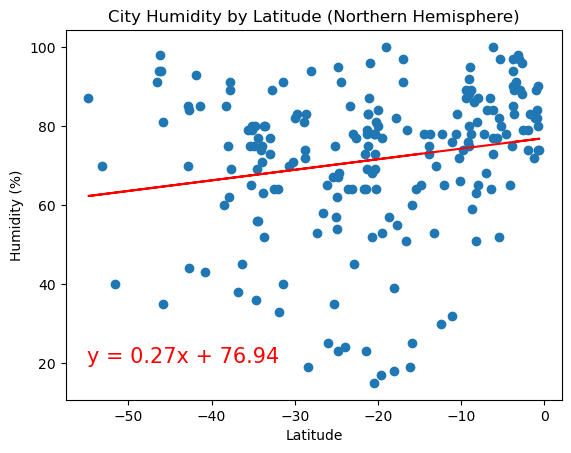

In [75]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],-55,20,"City Humidity by Latitude (Southern Hemisphere)","Latitude","Humidity (%)")

In [73]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
res = sts.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.035235


**Discussion about the linear relationship:** 

### There is a weak linear relationship between Latitude and Humidity in both the Northern and Southern Hemispheres. The slope of the lines of best fit are .31 and .27 respectively. Both models' R-squared values, .07 and .04, imply that latitude may be one of several factors that affect humidity, but it in it of itself does not fully explain humidity in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

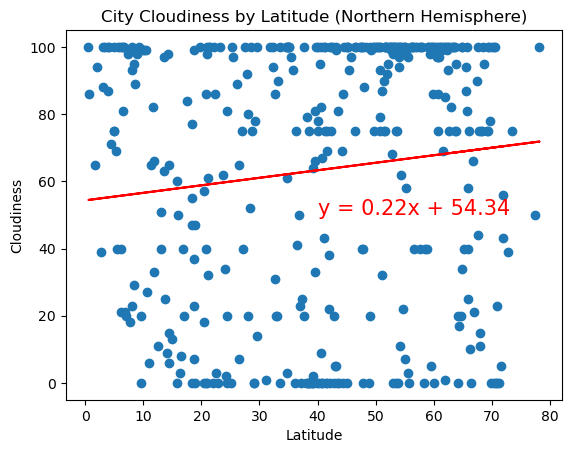

In [78]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],40,50,"City Cloudiness by Latitude (Northern Hemisphere)","Latitude","Cloudiness")

In [83]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
res = sts.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.013389


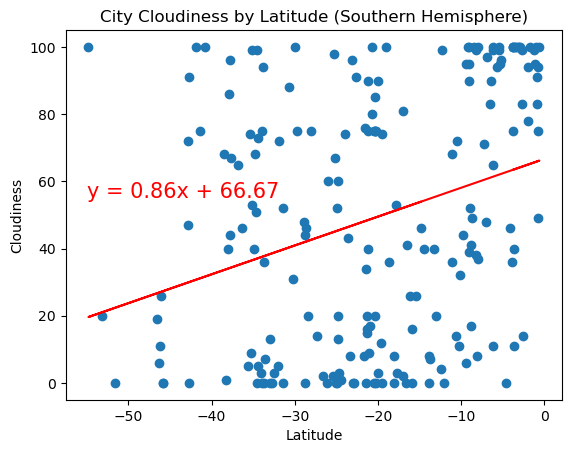

In [84]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],-55,55,"City Cloudiness by Latitude (Southern Hemisphere)","Latitude","Cloudiness")

In [85]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
res = sts.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.091050


**Discussion about the linear relationship:** 

### There is a stronger linear relationship between Cloudiness and Latitude in the Southern Hemisphere than there is in the Northern (line slopes of .86 and .22 respectively). Interestingly, in the Northern hemisphere, it appears that the father a city is from the equator, the cloudier it is. Whereas in the Southern Hemisphere, the closer a city is to the equator the cloudier it is. However, in both cases, the R-squared value is particularly small, implying that Latitude is far from a perfect predictor of Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

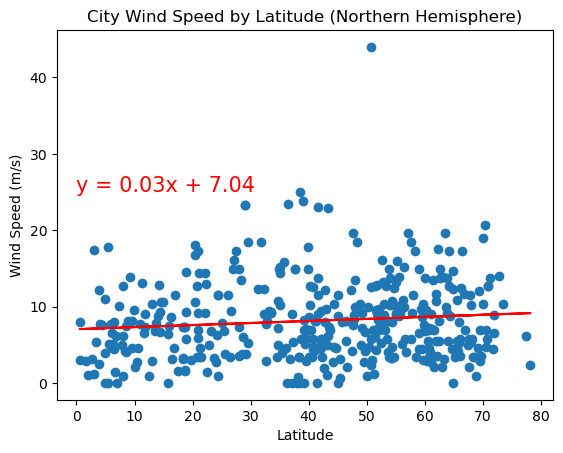

In [97]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],0,25,"City Wind Speed by Latitude (Northern Hemisphere)","Latitude","Wind Speed (m/s)")

In [98]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
res = sts.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.010346


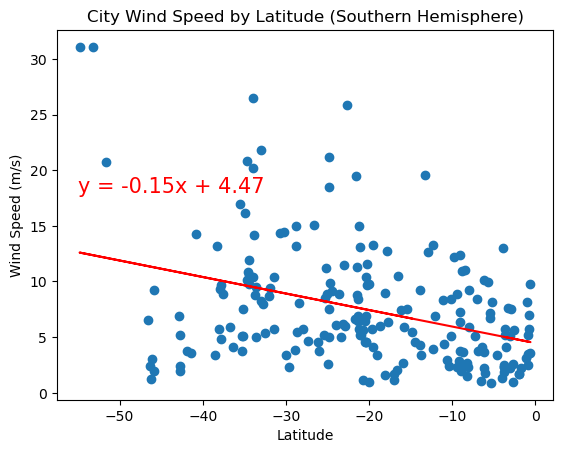

In [102]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],-55,18,"City Wind Speed by Latitude (Southern Hemisphere)","Latitude","Wind Speed (m/s)")

In [103]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
res = sts.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.130519


**Discussion about the linear relationship:** 

### Among the variables analyzed thus far, Latitude and Wind Speed show the weakest linear relationship with the Northern Hemisphere having close to zero relationship at all (m = .03). In the Southern Hemisphere, the data show a slight negative correlation (m = -.15), meaning that Wind Speed increases as City's move away from the equator. 